#**ML Techniques & Strategies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, f1_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Step 1: Creating a Dummy Dataset

In [ ]:
# Creating a dummy dataset with 2 classes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
data['target'] = y

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2: Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print(data.describe())


         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.053827     0.018832    -0.480995     0.020933     0.336366   
std       2.130360     2.095132     1.879645     2.011018     3.542104   
min      -6.865339    -7.030162    -6.227178    -6.184692   -11.421566   
25%      -1.347721    -1.360239    -1.762233    -1.272814    -1.861818   
50%       0.092325     0.125624    -0.561960     0.138819     0.302071   
75%       1.517749     1.410062     0.730689     1.459672     2.679576   
max       7.021821     8.237993     6.903293     6.832418    11.988010   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.002051     0.023751    -0.518758     0.318615    -0.477339  ...   
std       0.988013     1.011611     2.104034     2.955660     2.050913  ...   
min      -3.25033

In [ ]:
# Checking for null values
print(data.isnull().sum())

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
target        0
dtype: int64


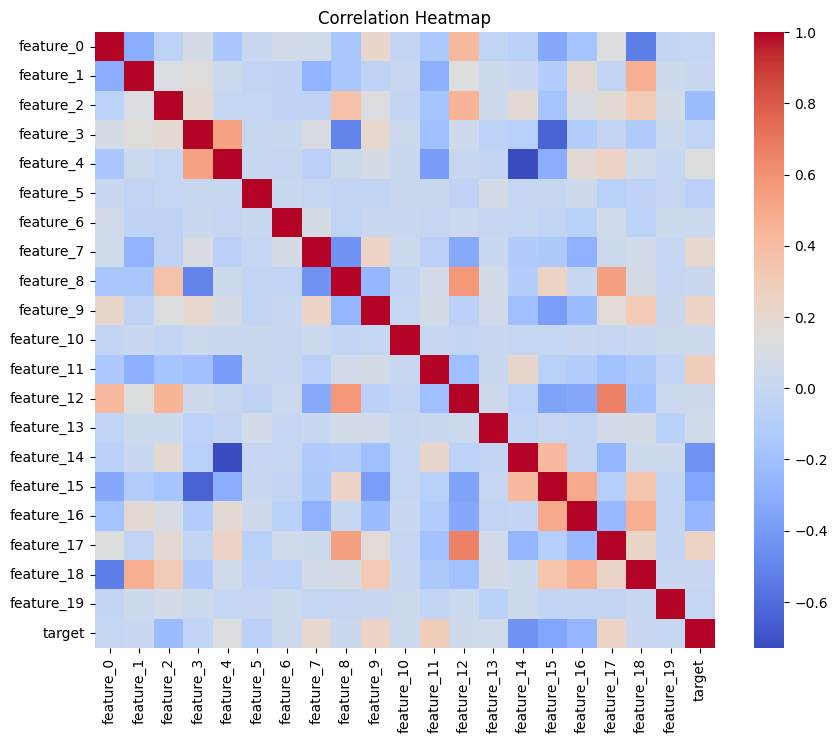

In [ ]:
# Visualizing the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

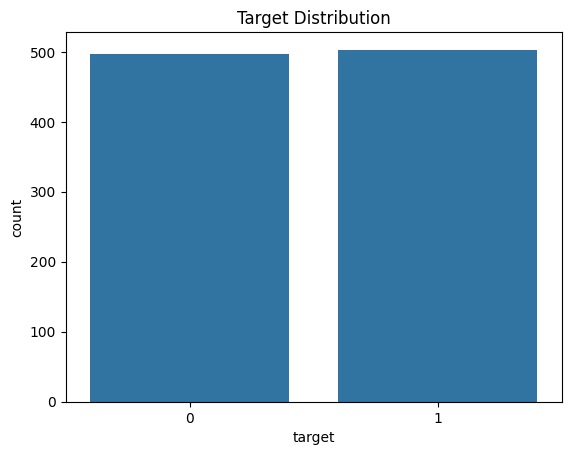

In [ ]:
# Target distribution
sns.countplot(x='target', data=data)
plt.title("Target Distribution")
plt.show()

## Step 3: Gradient Boosting (GB)

### What It Does
Gradient Boosting builds models sequentially, where each new model corrects the errors of the previous one. It's effective for both regression and classification tasks.

### Why Use
- Handles complex data relationships.
- Built-in feature importance.

In [ ]:
# Training Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Accuracy: 0.88
F1 Score: 0.8811881188118812



## Step 4: XGBoost

### What It Does
XGBoost is a highly efficient and flexible implementation of Gradient Boosting with additional regularization.

### Why Use
- Speed and performance.
- Handles missing values well.

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9
ROC-AUC: 0.9746898759503801


## Step 5: CatBoost

### What It Does
CatBoost is designed to handle categorical features directly and prevent overfitting.

### Why Use
- Easy handling of categorical data.
- Robust against overfitting.

In [ ]:
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("ROC-AUC:", roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.92
ROC-AUC: 0.9839935974389755



## Step 6: LightGBM

### What It Does
LightGBM uses histogram-based algorithms for faster computation and better performance on large datasets.

### Why Use
- High speed and efficiency.
- Scales well with large datasets.


In [ ]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("ROC-AUC:", roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]))

[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.925
ROC-AUC: 0.9797919167667066


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Step 7: Hyperparameter Tuning

### Grid Search

In [ ]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
gs = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3)
gs.fit(X_train, y_train)
print("Best Parameters:", gs.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 200}


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid, n_iter=5, cv=3, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'max_depth': 5}


### Bayesian Optimization (with Hyperopt)

In [ ]:
from hyperopt import hp, tpe, fmin

def objective(params):
    model = GradientBoostingClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return -score

param_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
}

best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=50)
print("Best Parameters:", best)

100%|██████████| 50/50 [02:45<00:00,  3.30s/trial, best loss: -0.9337294547229497]
Best Parameters: {'max_depth': 1, 'n_estimators': 2}


## Step 8: Ensemble Methods

### Stacking

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
!pip install --upgrade scikit-learn xgboost


In [ ]:
estimators = [('xgb', xgb_model), ('cat', cat_model)]
stacking = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
stacking.fit(X_train, y_train)
print("Stacking Accuracy:", accuracy_score(y_test, stacking.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or o

AttributeError: 'super' object has no attribute '__sklearn_tags__'

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define Bagging Classifier
bagging = BaggingClassifier(estimator=GradientBoostingClassifier(random_state=42),
                            n_estimators=10,
                            random_state=42)

# Fit the model
bagging.fit(X_train, y_train)

# Evaluate the model
print("Bagging Accuracy:", accuracy_score(y_test, bagging.predict(X_test)))


Bagging Accuracy: 0.895


### Boosting
Covered in Gradient Boosting, XGBoost, CatBoost, and LightGBM sections.

## Step 9: Model Evaluation

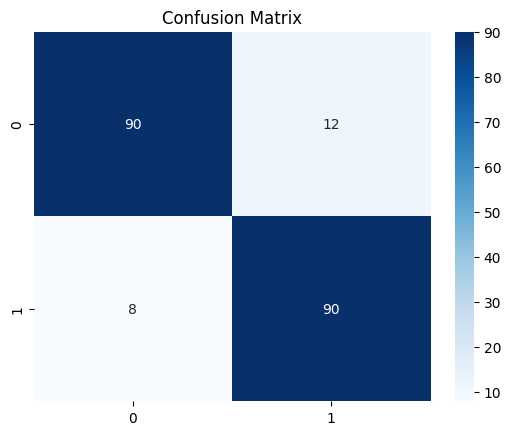

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

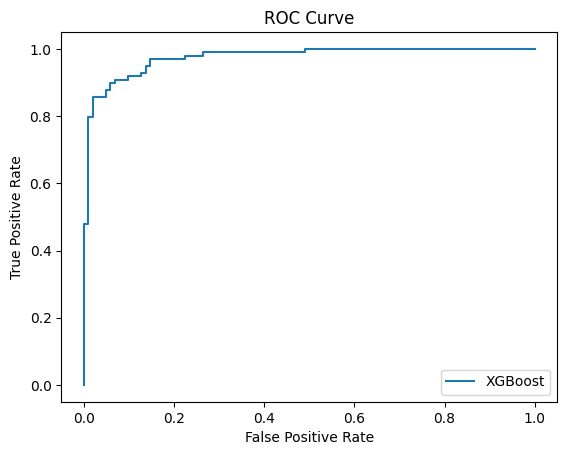

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming xgb_model is already trained
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


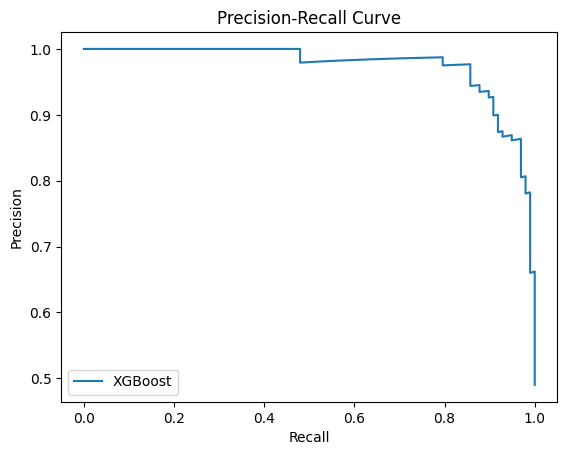

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()